## Projeto de Transfer Learning em Python

O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

 - O [dataset](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) utilizado engloba duas classes: gatos e cachorros

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 10 not upgraded.
Need to get 420 MB of archives.
After this operation, 1,622 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 22s (19.2 MB/s)
(Reading database ... 123934 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
(Reading database ... 123911 files and directories currently installed.)
Prepar

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/

In [6]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory('/content/cats_and_dogs/train', batch_size = 32, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
val_data_gen = train_image_generator.flow_from_directory('/content/cats_and_dogs/validation', batch_size = 32, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
test_data_gen = train_image_generator.flow_from_directory('/content/cats_and_dogs/',classes=['test'] , batch_size = 32, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary', shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


Plotando as imagens usando a função <strong><i>plotImages</i></strong> que tem um <i>array<i/> de imagens e probabilidades.

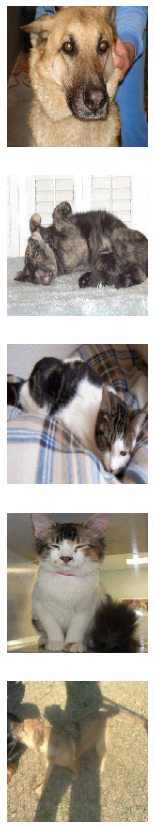

In [8]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

- Recriando a <i>train_image_generator</i> com <i>ImageDataGenerator</i>.

In [9]:
train_image_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 180, horizontal_flip= True, vertical_flip= True, height_shift_range=2, zoom_range=0.5,shear_range=2)

Através da função <i>PlotImages</i>, 5 imagens são mostradas abeixo a partir da  <i>train_image_generator</i>.
 - 5 variações de uma única imagem plotada.

Found 2000 images belonging to 2 classes.


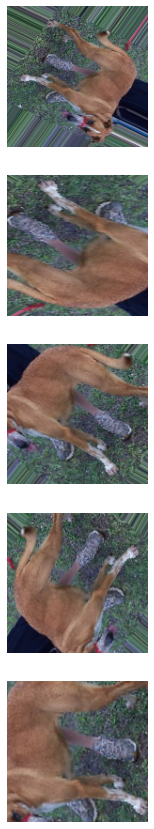

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Um modelo de rede neural é definido usando keras. 

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT,IMG_WIDTH, 3), activation = 'relu')) #convulucion
model.add(MaxPooling2D(pool_size = (2, 2))) # Pooling
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(tf.keras.layers.Dense(units=512, activation= 'relu')) 
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

Treinamento da rede

In [12]:
history = model.fit(train_data_gen, steps_per_epoch=16, epochs=epochs, validation_steps=8, validation_data= val_data_gen)

Epoch 1/20
16/16 [==============================] - 92s 6s/step - loss: 2.0780 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 2/20
16/16 [==============================] - 87s 5s/step - loss: 0.6910 - accuracy: 0.5115 - val_loss: 0.7011 - val_accuracy: 0.4727
Epoch 3/20
16/16 [==============================] - 88s 5s/step - loss: 0.6837 - accuracy: 0.5555 - val_loss: 0.6801 - val_accuracy: 0.5742
Epoch 4/20
16/16 [==============================] - 91s 6s/step - loss: 0.6827 - accuracy: 0.5880 - val_loss: 0.6866 - val_accuracy: 0.5352
Epoch 5/20
16/16 [==============================] - 88s 5s/step - loss: 0.6838 - accuracy: 0.5485 - val_loss: 0.6631 - val_accuracy: 0.5352
Epoch 6/20
16/16 [==============================] - 86s 5s/step - loss: 0.6617 - accuracy: 0.5785 - val_loss: 0.6312 - val_accuracy: 0.5898
Epoch 7/20
16/16 [==============================] - 88s 5s/step - loss: 0.6679 - accuracy: 0.5955 - val_loss: 0.6734 - val_accuracy: 0.5859
Epoch 8/20
16/16 [==

Visualizar a precisão e a perda do modelo.

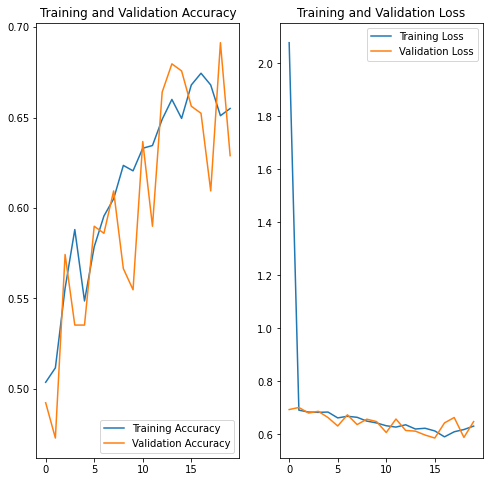

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Fazendo previsões

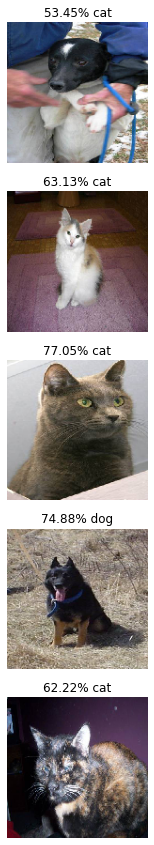

In [18]:
probabilities = model.predict(test_data_gen).flatten()

sample_test_images, _ = next(test_data_gen)
plotImages(sample_test_images[:5], probabilities)